<h1 align="center">YRoots</h1>

YRoots is a numerical rootfinding package which can be used to solve multivariate systems of nonlinear equations, like those arising from optimization problems in finding critical points. While other rootfinders exist, YRoots is unique in that it finds all the roots in a compact interval.

Download YRoots from github to begin using the package.

  ```git
      git clone https://github.com/tylerjarvis/RootFinding/tree/master   
  ```
  
We demonstrate here how to use YRoots.

In [1]:
#imports
import numpy as np
import yroots as yr

#plotting tools
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#autoreload
%load_ext autoreload
%autoreload 2

## Multivariate Functions

To find the commmon zeros of a set of multivariate functions, input a list of functions and a search interval. The syntax for this is:

```python
yr.solve(funcs, a, b)
```

where `funcs` is a list of $n$ **vectorized** functions in $n$ variables and `a` and `b` are array-like objects of upper and lower bounds (respectively) of the search domain in each dimension. For bivariate systems, the optional parameter `plot` allows the user to graph the zero-loci and roots of the functions. The parameter `polish` can improve the accuracy for multivariate systems.

YRoots returns a numpy array where each row is a root.

### Two variables
Here is an example of YRoots solving the bivariate system of equations

$$0 = \sin(xy) + x\log(y+3) - x^2 + \frac{1}{y-4}$$
$$6 = \cos(3xy) + e^{\frac{3y}{x-2}} - x.$$

Solutions of the system subject to the constrains $-1\leq x\leq0,-2\leq y\leq1$ are common roots of the functions

$$f(x,y) = \sin(xy) + x\log(y+3) - x^2 + \frac{1}{y-4} $$
$$g(x,y) = \cos(3xy) + e^{\frac{3y}{x-2}} - x - 6$$ on the search domain $[-1,0]\times[-2,1]$.

Percent Finished: 100%       
Total intervals checked was 144
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [ 4.1667 92.3611  0.      3.4722]


<Figure size 7200x4800 with 0 Axes>

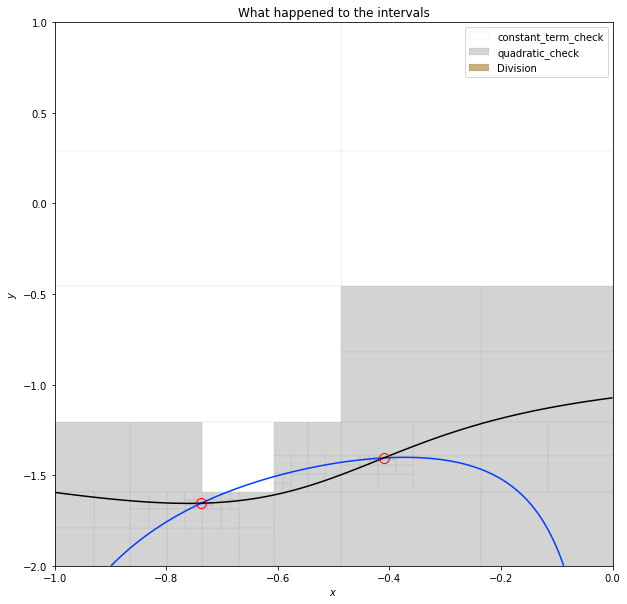

CPU times: user 1.06 s, sys: 48.2 ms, total: 1.11 s
Wall time: 1.06 s


(2, 3.964378242349298e-09, 9.232401509962074e-10)

In [130]:
#define the functions
f = lambda x,y : np.sin(x*y) + x*np.log(y+3) - x**2 + 1/(y-4)
g = lambda x,y : np.cos(3*x*y) + np.exp(3*y/(x-2)) - x - 6

#search domain bounds
a = [-1,-2] #lower bounds on x and y
b = [0,1] #upper bounds on x and y

#time
%time roots = yr.solve([f,g], a, b, plot=True, plot_intervals=True, polish=False)

#show the number of roots and maximal residuals
roots.shape[0],np.max(np.abs(f(roots[:,0],roots[:,1]))),np.max(np.abs(g(roots[:,0],roots[:,1])))

Here is a slightly more complex system on the search domain $[-1,1]\times[-1,1]$ from [this paper](https://link.springer.com/article/10.1007/s00211-014-0635-z).

$$f(x,y) =\sin(30x−y/30)+y$$
$$g(x,y) =\cos(x/30−30y)−x$$

Percent Finished: 100%         
Total intervals checked was 15595
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [ 2.379  95.0818  2.5393  0.    ]


<Figure size 7200x4800 with 0 Axes>

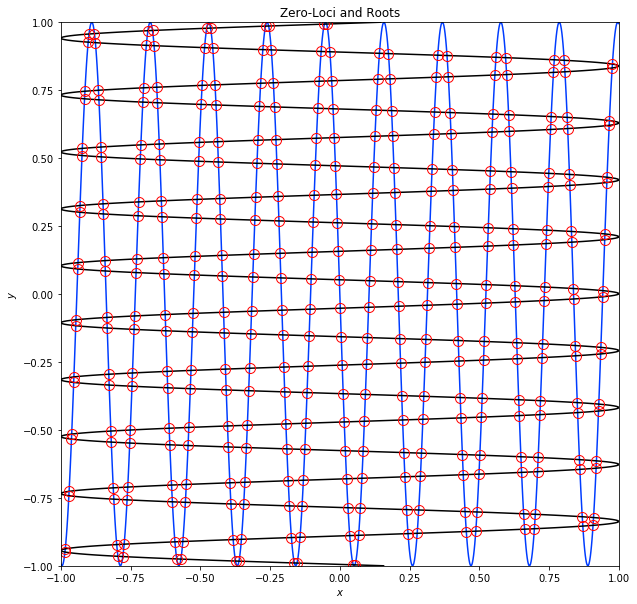

CPU times: user 8.88 s, sys: 157 ms, total: 9.03 s
Wall time: 8.96 s


(363, 9.64567581362985e-09, 9.73499714174153e-09)

In [131]:
#functions
f = lambda x,y: np.sin(30*x-y/30)+y
g = lambda x,y: np.cos(x/30-30*y)-x
#search domain
a = [-1,-1] #lower
b = [1,1] #upper

#time
%time roots =  yr.solve([f,g], a, b, plot=True, plot_intervals=False, polish=False)

#show the number of roots and maximal residuals #363 or 362 Roots
roots.shape[0],np.max(np.abs(f(roots[:,0],roots[:,1]))),np.max(np.abs(g(roots[:,0],roots[:,1])))

#TODO: Why are we missing a root around (1,.75) and (0,-1)? 
# If we mess with the parameters for good_roots_nd, we get way to many roots

Expect 363 roots

Here is a more complicated bivariate system on the region $[-5,5]\times[-5,5]$.

$$f(x,y) = \sin(20x+y)$$
$$g(x,y) = \cos(x^2+xy)-\frac{1}{4}$$

Notice that YRoots correctly avoids points that are nearly roots but are not roots.

48735155.025798306
148408230.48449957
881681724.4026982
153765732.17070457
41351786.12791289
206735881.00003114
89825031.3135928
92362679.05235025
21997614.780893747
21197726.07136717
1150227134.927058
29986527.72104918
24876898.69045452
10640587.945631608
5236428.926407755
34058699.51666298
72112473.36250755
15021398.892440652
12334835.065407725
1209534717.910113
20712738.023057606
12592485.618312139
3783295.516034941
4227081.885280862
3385934.3677574703
7064589.496957411
Percent Finished: 1.26%       2631132.9450744097
3499544.402161122
133252798.45324461
61981998.538533226
198313221.7008347
93727540.57793452
38533967.65201073
66063552.98189945
27843713.788953047
44225387.970022194
20281106.41575944
46389636.82678359
1430569726.054572
41224999.02684527
58349626.402308345
59394410.43115493
374267422.9355659
621228517.2827734
141681562522.14508
FAIL
3098554.0753126354
12955683.458223335
8961191.248078847
14043124.702462746
6248626.410789967
13754455.13550274
9975183.85398921
44140955.3

137000359.00669923
1592407715.7915597
47696729.72886322
132702030.57269876
117954368.45719606
87815038.8895146
480424008.6814157
2764112.9555332107
55133653.66459651
1096566.288843427
16114709454.883154
FAIL
3189208.016685991
4317046.791146597
1999812.3904721076
104887093.08973432
1587705328.4019485
1147933.9272541644
210003717.98805463
3115019.6439208365
1235279.479564695
61141702.43533672
1605629.3797384892
3035614.8525203415
960429.027502919
1320590.5264450663
1532338.4937537378
583214.9800902085
Percent Finished: 35.77%       1287326.666609458
1140012.625665752
2511199.2540727123
1980860.183915276
805028.1963516704
1075235.7061890003
897023.7016225352
401522.1746773238
3056569.952538491
945015.8317236878
3083023.958515883
2957598.1558324136
193609755.11723247
375969380.7285589
2027032.256075821
4943846.6398159545
2960870.3814906506
3208097.8933623955
2359330.171914312
1123797.7749277046
4851607.611317978
2529546.920568501
2186494.5777909653
2497443.749375637
2493888.320662327
Perce

4654783.425189315
3762077.7798987105
1388104477.1309738
5252825.113421677
2696834.1670635287
1791077.4660244966
Percent Finished: 85.63%       24911079.116443884
184705630.8741457
3565314.984143146
2558313.148012434
19770594.517424624
57279172.578485146
2747209.431757491
1554595.8827888602
4556376.758871167
2339690.1781430133
3826925.308069355
8316132.168400233
101721904912.26933
FAIL
969072216.1528105
138729397.16472942
155841595.4024986
477632265.545044
1546978.7503653257
5057642.696675556
77616472.10296276
2627737222.1941032
28456272.070401914
428174960.5813341
227227378528.56726
FAIL
84612357.24386103
Percent Finished: 88.08%       7709374.762708722
1128858.6408713304
1708017.9633533438
6662398684.641494
4933764.547099936
5751080.1693724
3409917.3158964957
3837975359.186265
12616115.236826777
199001856.5059444
47687083.18831273
181097311.29216784
8856592355.660044
13391033604.863277
FAIL
1826871.5751832505
3235937.5346986535
3388579.452780746
2905201.8113130755
2713334.3857010948
1

<Figure size 7200x4800 with 0 Axes>

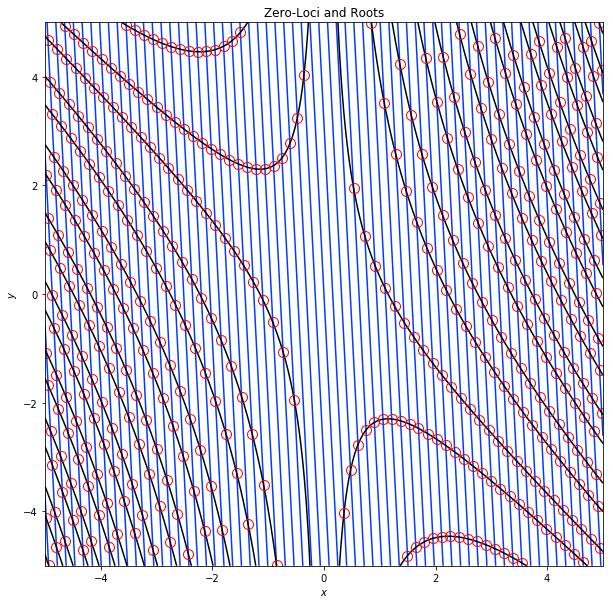

CPU times: user 15 s, sys: 1.24 s, total: 16.3 s
Wall time: 16 s


(452, 4.0981726459572754e-05, 6.041983565391318e-05)

In [102]:
#define functions and search domain
f = lambda x,y : np.sin(20*x+y)
g = lambda x,y : np.cos(x**2+x*y)-.25
a = [-5,-5]
b = [5,5]

#solve and time
%time roots = yr.solve([f,g], a, b,plot=True, polish=False)

#show the number of roots and maximal residuals #452 Roots
roots.shape[0],np.max(np.abs(f(roots[:,0],roots[:,1]))),np.max(np.abs(g(roots[:,0],roots[:,1])))

Expect 452 roots

Here is an ill-conditioned system from [this paper](https://link.springer.com/article/10.1007/s00211-014-0635-z) on the domain $[-1,1]\times[-1,1]$.

$$\Pi_{i=0}^{10}(y^2(4y^2−\frac{i}{10})−x^2(4x^2−1)) = 0$$
$$256(x^2+y^2)^2+288(x^2+y^2)−512(x^3−3xy^2)=27$$

In [133]:
#functions
f = lambda x,y: np.prod([y**2*(4*y**2-i/10)-x**2*(4*x**2-1) for i in range(11)],axis=0)
g = lambda x,y: 256*(x**2+y**2)**2+288*(x**2+y**2)-512*(x**3-3*x*y**2)-27
#search domain
a = [-1,-1] #lower
b = [1,1] #upper
#time
%time roots = yr.solve([f,g], a, b,plot=True, plot_intervals=False, polish=False)

#show the number of roots and maximal residuals
roots.shape[0],np.max(np.abs(f(roots[:,0],roots[:,1]))),np.max(np.abs(g(roots[:,0],roots[:,1])))


Percent Finished: 11.48%       

KeyboardInterrupt: 

(452, 2.077193195004823e+37, 760721.7277295026)

Expect 54 roots

### Using YRoots for optimization

YRoots can also be used for optimization problems, since the common roots of the partial derivatives of a function are critical points. 

The Rosenbrock function is often used as a performace test for optimization algorithms. It is well suited to be optimized with YRoots. 

$$f(x,y) = (1-x)^2 + 100(y-x^2)^2$$

In [220]:
#define function
f = lambda x,y: (1-x)**2 + 100*(y-x**2)**2

#partial derivatives
fx = lambda x,y: 2*(x-1) + 200*(y-x**2)*(-2*x)
fy = lambda x,y: 200*(y-x**2)

In [217]:
from yroots.Multiplication import multiplication
from yroots.Division import division
from yroots.polynomial import MultiPower
division([MultiPower(np.array([[-2., 0.], [2. , -400.], [0. , 0.], [400., 0.]])),
                MultiPower(np.array([[0., 200.], [0. , 0.],[-200., 0.]]))], divisor_var=1)

4.490440707442107e+16
FAIL


-1

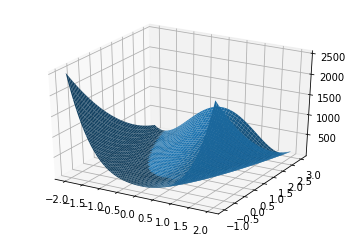

In [8]:
#3D plot of the function to optimize
x = np.linspace(-2,2, 1000)
y = np.linspace(-1,3, 1000)
X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(X, Y, f(X,Y))

In [48]:
np.random.randn()/50 + .5
RAND = 0.508514051024086

[0.99916815 0.99994437] [1.01390027 1.01467649]
[array([[ 2.39447736, -2.96567645,  0.        ],
       [ 6.01697751, -0.02170353,  0.        ],
       [ 0.03282228,  0.        ,  0.        ]]), array([[-1.16556174,  1.47321195,  0.        ],
       [-2.96567645,  0.        ,  0.        ],
       [-0.00542588,  0.        ,  0.        ]])]
1704.2580392965695
Percent Finished: 100%       
Total intervals checked was 1
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [  0.   0.   0. 100.]


<Figure size 7200x4800 with 0 Axes>

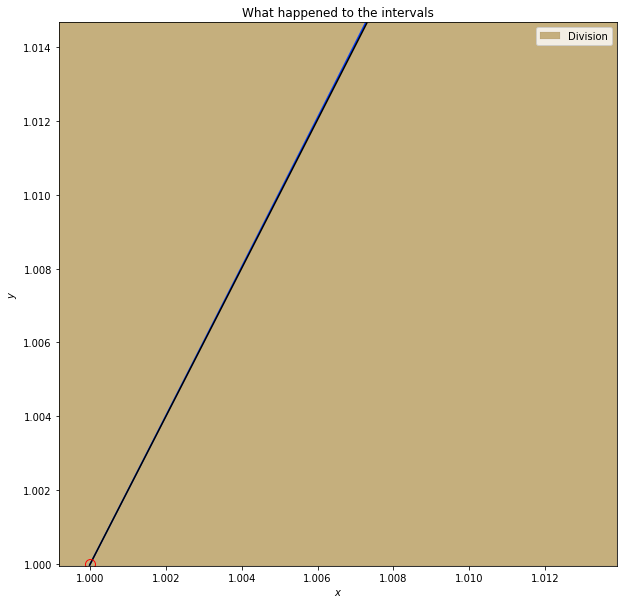

CPU times: user 654 ms, sys: 47.3 ms, total: 701 ms
Wall time: 504 ms


In [219]:
#find common roots
low = np.array([-2.,-1.])
upp = np.array([2.,3.])

def get_interval(steps, a, b):
    RAND = 0.5139303900908738
    for step in steps:
        diffs1 = ((b-a)*RAND)
        diffs2 = ((b-a)-(b-a)*RAND)
        if step == 0:
            a += diffs1
        elif step == 1:
            a[0] += diffs1[0]
            b[1] -= diffs2[1]
        elif step == 2:
            b -= diffs2
        elif step == 3:
            a[1] += diffs1[1]
            b[0] -= diffs2[0]
    return a,b

steps = [1,3,0,0,0,0,2,2]
low,upp = get_interval(steps, low, upp)
print(low,upp)

%time zeros = yr.solve([fx,fy],low,upp,plot=True, plot_intervals=True, polish=False)

In [17]:
#evaluate at critical points
values = f(zeros[:,0],zeros[:,1])
#report mimima and minimizers
mimimizer = np.argmin(values)
values[mimimizer], zeros[mimimizer]

(1.5426972238178534e-19, array([1., 1.]))

[-2. -2.] [2. 2.]
59813.18031111818
39063.828368415
60620.457853271495
236274.2390322244
331345.7120399664
522716.1041603638
149890.1495420656
188205.6679505777
196626.2203587471
501323.4600969416
676077.6920262605
1069158.2131719477
1009654.9938375029
89048.83113191064
735130.719063288
149162.81177661184
832609.7709572882
Percent Finished: 100%       
Total intervals checked was 43
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [ 0.     60.4651  0.     39.5349]


<Figure size 7200x4800 with 0 Axes>

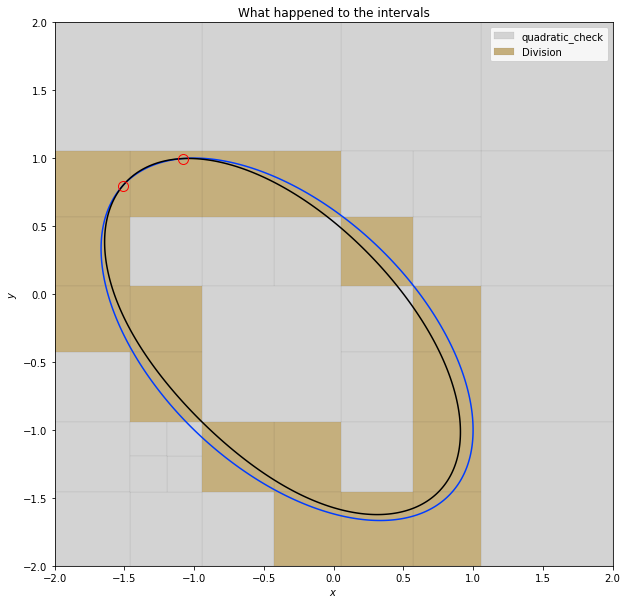

In [201]:
epsilon = .1

def f(x,y):
    return x**2 + y**2 + x + y + x*y-1
def g(x,y):
    return np.sin(x) + np.cos(y) + np.exp(x*y)
def h(x,y):
    return f(x,y) + epsilon*g(x,y)

funcs = [f,h]

a = -2*np.ones(2)
b = 2*np.ones(2)

steps = []
a,b = get_interval(steps, a, b)
print(a,b)

zeros = yr.solve(funcs,a,b,plot=True, plot_intervals=True, polish=False)

Nick Trefethen's Hundred-dollar, Hundred-digit Challenge problems include finding the minimum of the function 
$$f(x,y) = e^{\sin(50x)} + \sin(60e^y) + \sin(70 \sin (x))+\sin(\sin(80y)) - \sin(10(x+y)) + 1/4(x^2 + y^2).$$

(Problem 4, [here](https://en.wikipedia.org/wiki/Hundred-dollar,_Hundred-digit_Challenge_problems))

In [142]:
#define function
f = lambda x,y : np.exp(np.sin(50*x)) + np.sin(60*np.exp(y)) + np.sin(70*np.sin(x)) + np.sin(np.sin(80*y)) \
                - np.sin(10*(x+y)) + .25 * (x**2 + y**2)

#partial derivatives
fx = lambda x,y : 50*np.cos(50*x)*np.exp(np.sin(50*x)) + 70*np.cos(x)*np.cos(70*np.sin(x)) - 10*np.cos(10*(x+y)) + .5 * x
fy = lambda x,y : 60*np.exp(y)*np.cos(60*np.exp(y)) + 80*np.cos(80*y)*np.cos(np.sin(80*y))- 10*np.cos(10*(x+y)) + .5 * y

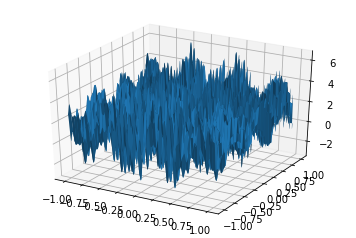

In [143]:
#3D plot of the function to optimize
x = np.linspace(-1,1, 1000)
X, Y = np.meshgrid(x, x)

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(X, Y, f(X,Y))

Percent Finished: 100%         
Total intervals checked was 104763
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [2.90484e+01 6.82865e+01 3.80000e-03 2.66120e+00]


<Figure size 7200x4800 with 0 Axes>

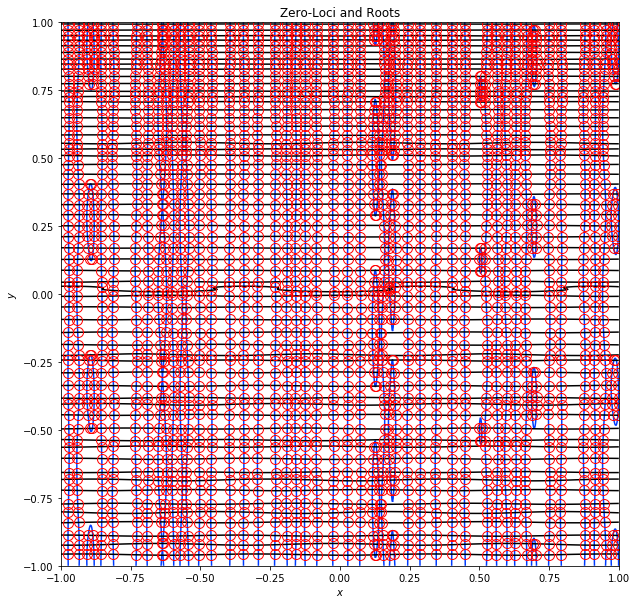

CPU times: user 2min 6s, sys: 1.9 s, total: 2min 8s
Wall time: 2min 8s


In [151]:
#find common roots
low = -np.ones(2)
upp = np.ones(2)
%time zeros = yr.solve([fx,fy],low,upp,plot=True, polish=False)

In [ ]:
#-8, -12

#Division
Total intervals checked was 74195
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [2.65274e+01 6.96785e+01 1.30000e-03 3.79270e+00]
CPU times: user 1min 42s, sys: 1.59 s, total: 1min 43s
Wall time: 1min 44s
    
#Multiplication
Total intervals checked was 98453
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [19.9913 77.1607  0.2773  2.5708]
CPU times: user 1min 51s, sys: 1.71 s, total: 1min 53s
Wall time: 1min 53s

#-10, -13

#Division
Total intervals checked was 104763
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [2.90484e+01 6.82865e+01 3.80000e-03 2.66120e+00]
CPU times: user 2min 6s, sys: 1.9 s, total: 2min 8s
Wall time: 2min 8s
    
#Multiplication
Total intervals checked was 134886
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [22.5613 75.3496  0.6517  1.4375]
CPU times: user 2min 22s, sys: 2.33 s, total: 2min 24s
Wall time: 2min 25s

In [ ]:
#Div no is good check
Total intervals checked was 39392
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [1.07128e+01 8.20928e+01 2.50000e-03 7.19180e+00]
CPU times: user 1min 15s, sys: 1.04 s, total: 1min 16s
Wall time: 1min 16s
(9.923426448395223e-05, 9.914618824741206e-05)
#Div with is good check
Total intervals checked was 48011
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [ 8.798  85.3617  0.1562  5.6841]
CPU times: user 48.8 s, sys: 655 ms, total: 49.5 s
Wall time: 49.3 s
(9.923426448395223e-05, 9.914618824741206e-05)
#Mult no is good check
Total intervals checked was 27842
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [15.1103 74.6175  0.     10.2723]
CPU times: user 52 s, sys: 952 ms, total: 53 s
Wall time: 53.5 s
(9.367938315724134e-05, 9.951409854652704e-05)
#Mult with is good check
Total intervals checked was 44819
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [ 9.4201 84.3325  0.1049  6.1425]
CPU times: user 50.7 s, sys: 1.02 s, total: 51.8 s
Wall time: 52.7 s
(9.923426448395223e-05, 9.764175189499319e-05)

In [152]:
#how many zeros it found
zeros.shape

(2720, 2)

In [153]:
#maximum residuals of common roots
np.max(np.abs(fx(zeros[:,0],zeros[:,1]))),np.max(np.abs(fy(zeros[:,0],zeros[:,1])))

(9.980155590838535e-11, 9.848166726555974e-11)

In [99]:
#evaluate at critical points
values = f(zeros[:,0],zeros[:,1])
#report mimima and minimizers
mimimizer = np.argmin(values)
values[mimimizer], zeros[mimimizer]

(-3.3068686474750946, array([-0.02440309,  0.21061243]))

YRoots can solve systems in higher dimensions as well. Moving forward, our goal is to increase rootfinding feasibility for high dimensional systems.

Here are examples of YRoots running on systems in three and four variables.

### Three variables, Domain $[-1,1]\times[-1,1]\times[-1,1]$

$$ f(x,y,z) = sin(5x+y+z)$$
$$ g(x,y,z) = sin(xyz)$$
$$ h(x,y,z) = x^2 + y^2 - z^2 - 1$$


In [117]:
#define the functions and the search domain
f = lambda x,y,z : np.sin(5*x+y+z)
g = lambda x,y,z : np.sin(x*y*z)
h = lambda x,y,z : x**2+y**2-z**2-1
a = -np.ones(3)
b = np.ones(3)

In [120]:
#solve and time
%time roots = yr.solve([f,g,h], a, b, polish=False)
#show the number of roots and maximal residuals
roots.shape[0],np.max(np.abs(f(*[roots[:,i] for i in range(3)]))),np.max(np.abs(g(*[roots[:,i] for i in range(3)]))),np.max(np.abs(h(*[roots[:,i] for i in range(3)])))

Percent Finished: 100%         
Total intervals checked was 2118
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [ 0.661 98.678  0.661  0.   ]
CPU times: user 1.32 s, sys: 19.3 ms, total: 1.34 s
Wall time: 1.38 s


(6, 2.279402293329969e-13, 1.4383188254829387e-09, 2.3825605932614735e-09)

The code below graphs these level surfaces and their common roots (code is from [here](https://stackoverflow.com/questions/4680525/plotting-implicit-equations-in-3d)).

/Users/erikhalesparkinson/anaconda/lib/python3.6/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


(-1, 1)

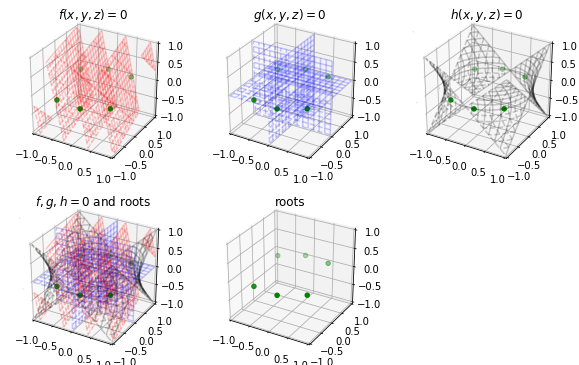

In [121]:
#function for plotting level surfaces in 3D
def plot_implicit(fn, color, bbox=(-1,1)):
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==0)
    bbox ..the x,y,and z limits of plotted interval'''
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    A = np.linspace(xmin, xmax, 100) # resolution of the contour
    B = np.linspace(xmin, xmax, 15) # number of slices
    A1,A2 = np.meshgrid(A,A) # grid on which the contour is plotted

    for z in B: # plot contours in the XY plane
        X,Y = A1,A2
        Z = fn(X,Y,z)
        cset = ax.contour(X, Y, Z+z, [z], colors=color,alpha=.2,zdir='z')
        # [z] defines the only level to plot for this contour for this value of z

    for y in B: # plot contours in the XZ plane
        X,Z = A1,A2
        Y = fn(X,y,Z)
        cset = ax.contour(X, Y+y, Z, [y], colors=color,alpha=.2,zdir='y')

    for x in B: # plot contours in the YZ plane
        Y,Z = A1,A2
        X = fn(x,Y,Z)
        cset = ax.contour(X+x, Y, Z, [x], colors=color,alpha=.2,zdir='x')

    #set plot limits
    ax.set_zlim3d(zmin,zmax)
    ax.set_xlim3d(xmin,xmax)
    ax.set_ylim3d(ymin,ymax)
    
#plot each level surface individually, then together

#f
fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(631, projection='3d')
ax.scatter(*[roots[:,i] for i in range(3)],color='g')
plot_implicit(f,'r')
ax.set_title('$f(x,y,z)=0$')

#g
ax = fig.add_subplot(632, projection='3d')
ax.scatter(*[roots[:,i] for i in range(3)],color='g')
plot_implicit(g,'b')
ax.set_title('$g(x,y,z)=0$')

#h
ax = fig.add_subplot(633, projection='3d')
ax.scatter(*[roots[:,i] for i in range(3)],color='g')
plot_implicit(h,'k')
ax.set_title('$h(x,y,z)=0$')

#together
ax = fig.add_subplot(634, projection='3d')
ax.scatter(*[roots[:,i] for i in range(3)],color='g')
plot_implicit(f,'r')
plot_implicit(g,'b')
plot_implicit(h,'k')
ax.set_title('$f,g,h = 0$ and roots')

#just the roots
ax = fig.add_subplot(635, projection='3d')
ax.scatter(*[roots[:,i] for i in range(3)],color='g')
ax.set_title('roots')
ax.set_zlim3d(-1,1)
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)

## Four Variable Optimization

As a final multivariate example, we solve the following system.

$$\cos(x_1) + x_4 = 1$$
$$\cos(x_2) + x_3 = 2$$
$$\cos(x_3) + x_2 = 3$$
$$\cos(x_4) + x_1 = 4$$

In [124]:
#functions
f1 = lambda x1, x2, x3, x4: np.cos(x1) + x4 - 1
f2 = lambda x1, x2, x3, x4: np.cos(x2) + x3 - 2
f3 = lambda x1, x2, x3, x4: np.cos(x3) + x2 - 3
f4 = lambda x1, x2, x3, x4: np.cos(x4) + x1 - 4

#domain
# a = [4,3.5,2,1.5]
# b = [4.5,4,3,2]
a = [-5,-5,-5,-5]
b = [5,5,5,5]

#solve and time
%time roots = yr.solve([f1,f2,f3,f4],a,b,polish=False)

#number of roots and maximum residual
roots.shape[0],np.max([np.abs(f(*[roots[:,i] for i in range(4)])) for f in [f1,f2,f3,f4]])
roots

Percent Finished: 100%         
Total intervals checked was 2636
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [74.7344 25.1138  0.1517  0.    ]
CPU times: user 26.7 s, sys: 395 ms, total: 27 s
Wall time: 27.1 s


array([[4.04674914, 3.91158389, 2.71791677, 1.61756251]])

### Univariate Functions

The `yr.solve` method can also be used to quickly find the roots of a univariate function. In this case, `a` and `b` can simply be entered as floats, and the `funcs` does not need to be a list.

As an example, we find the zeros of $f(x) = \sin(e^{3x})$ on $[-1,2]$.

In [ ]:
#define the function and search interval
f = lambda x : np.sin(np.exp(3*x))

a = -1
b = 2

#solve and time
%time roots = yr.solve(f, a, b, plot=True)
#show the number of roots and maximal residuals
roots.size,np.max(np.abs(f(roots)))

## Polynomials

When a function in a system is a polynomial, it may be useful to pass it in as a YRoots's `Polynomial` object. `Polynomial` objects may be more cumbersome to create, but they have a special `evaluate_grid` method which allows for faster Chebyshev-approximations.

If the system only includes `Polynomial` objects, it may be preferable to use the alternative `yr.polysolve` method which does not rely on Chebyshev approximations. The gains in speed depend on the degree and dimension of the system. Heuristically, these methods are faster than `yr.solve` for lower degree polynomial systems, but **these methods are only stable for roots where each coordinate has absolute value $< 1$.**

We demonstrate how to create `Polynomial` objects and how to use `yr.polysolve`.

### YRoot Polynomials

The two types of `Polynomial` objects are `MultiPower` and `MultiCheb`, corresponding to multivariate polynomials in the power basis and Chebyshev basis respectively. 
Polynomials in $n$-dimensions are represented by an $n$-dimensional array of coefficients. For a system with three variables, the $(i,j,k)$ spot in the coefficient tensor corresponds to the coefficients of $x^iy^jz^k$ in the power basis or $T_i(x)T_j(y)T_k(z)$ in the Chebyshev basis. It is probably easiest to construct this coefficient tensor by initializing a tensor of zeros and then setting each nonzero coefficient to the correct value.

For example, $f(x,y) = 5x^3 + 4 xy^2 + 3x^2 + 2y^2 + 1$ would be initialized as 
```python
coeff = np.zeros((4,4)) #4x4 matrix because it's a degree 3 polynomial
coeff[3,0] = 5
coeff[1,2] = 4
coeff[2,0] = 3
coeff[0,2] = 2
coeff[0,0] = 1
f = yr.MultiPower(coeff)```
                         
and $g(x,y,z) = 3T_1(x)T_2(y) + 5 T_2(z) + 2$ would be initialized as

```python
coeff = np.zeros((4,4,4))
coeff[1,2,0] = 3
coeff[0,0,5] = 5
coeff[0,0,0] = 2
g = yr.MultiCheb(coeff)```

### Polysolve

The function `yr.polysolve` has many options for polynomial rootfinding, but the default parameters are the most robust for most systems. The syntax is

```python
yr.polysolve(polys)```

where `polys` is a list of polynomial objects. All of the polynomials must be represented in the same basis. For systems that come from Chebyshev approximations, it may be better to add the optional parameter `MSmatrix=-1`.

As mentioned above, Polysolve is **only stable for finding roots where each coordinate has absolute value $< 1$.** Other roots near this region may be accurate, but how far away you can go before loosing accuracy depends on the degrees of the polynomials. By default, the system returns all the roots. To return only the roots which are guaranteed to be computed stably, use the optional parameter `return_all_roots=False`.

Additionally, while `yr.solve` only finds real roots, `yr.polysolve` finds complex roots as well. 

Below, we find the common roots of 

$$f(x,y) = y^2 + 3xy - 4x +1$$
$$g(x,y) = -6xy -2x^2 + 6y +3.$$


In [ ]:
#direct construction of polynomials with coefficient tensors
f = yr.MultiPower(np.array([[1, -4, 0],[0, 3, 0],[1, 0, 0]]))
g = yr.MultiPower(np.array([[3, 0, -2],[6, -6, 0],[0, 0, 0]]))

#solve and time
%time roots = yr.polysolve([f,g], return_all_roots=True)
#show the number of roots and maximal residuals
roots.shape[0],np.max(np.abs(f(roots))),np.max(np.abs(g(roots)))

In [ ]:
#plot f,g and roots
x = np.linspace(-5,5,1000)
y = np.linspace(-10,10,1000)
X,Y = np.meshgrid(x,y)
plt.contour(X,Y,f(np.array(list(zip(X,Y)))),levels=[0],colors='#003cff')
plt.contour(X,Y,g(np.array(list(zip(X,Y)))),levels=[0],colors='k')
plt.plot(roots[:,0],roots[:,1],'o',color='none',markeredgecolor='r',markersize=10)

In this case, the polynomias are of low degree, so even the roots outside the interval $[-1,1]\times[-1,1]$ are accurate.

We now find the common roots of the randomly generated polynomials higher degree polynomials A and B. In the first case, we return all the complex roots Polyroots found, and in the second we only return roots in the unit box.

In [ ]:
#get three random 2D polynomials of a certain degree in the power basis
degree = 20
np.random.seed(23)
A = yr.MultiPower(np.random.rand(degree,degree))
B = yr.MultiPower(np.random.rand(degree,degree))

#A and B will have roots at infinity (which yr.polysolve cannot yet handle) 
# unless their coefficient matrices are upper left triangular
A = yr.MultiPower(np.fliplr(np.triu(np.fliplr(A.coeff))))
B = yr.MultiPower(np.fliplr(np.triu(np.fliplr(B.coeff))))

In [ ]:
#All roots
#solve and time
%time roots = yr.polysolve([A,B], return_all_roots=True)
#show the number of roots and maximal residuals
roots.shape[0],np.max(A(roots)),np.max(B(roots))

In [ ]:
#Roots in unit box
#solve and time
%time accurate_roots = yr.polysolve([A,B],return_all_roots=False)
#show the number of roots and maximal residuals
accurate_roots.shape[0],np.max(A(accurate_roots)),np.max(B(accurate_roots))

Clearly, roots in the unit interval are more accurate for these higher degree systems. Still, real roots outside the region are visually perfect.

In [ ]:
#plot A,B and real roots
x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)
X,Y = np.meshgrid(x,y)
plt.contour(X,Y,A(np.array(list(zip(X,Y)))),levels=[0],colors='#003cff')
plt.contour(X,Y,B(np.array(list(zip(X,Y)))),levels=[0],colors='k')
#plot only the real roots
real_roots = roots[np.all(np.abs(roots.imag) < 1.e-10,axis = 1)]
plt.plot(np.real(real_roots[:,0]),np.real(real_roots[:,1]),'o',color='none',markeredgecolor='r',markersize=10)
real_roots

# YRoots Logo

In [ ]:
#making logo
one = lambda x,y: (y-.8)*(10*x+2.3)-.06*(2.5*x+2.3)**3+2+.2*np.sin(50*x)+.2*np.cos(50*y)
two = lambda x,y: (y-.8)*(-10*x+2.3)-.06*(-2.5*x+2.3)**3+2+.2*np.sin(50*x)+.2*np.cos(50*y)

In [ ]:
%time zeros = yr.solve([one,two],-np.ones(2),np.ones(2),plot=True,plot_intervals=True, polish=True)
#show the number of roots and maximal residuals
zeros.shape[0],np.max(np.abs(one(zeros[:,0],zeros[:,1]))),np.max(np.abs(two(zeros[:,0],zeros[:,1])))

In [ ]:
dim = 2
def get_interval(steps):
    a = np.array([-1.]*dim)
    b = np.array([1.]*dim)
    RAND = 0.5139303900908738
    for step in steps:
        diffs1 = ((b-a)*RAND)
        diffs2 = ((b-a)-(b-a)*RAND)
        if step == 0:
            a += diffs1
        elif step == 1:
            a[0] += diffs1[0]
            b[1] -= diffs2[1]
        elif step == 2:
            b -= diffs2
        elif step == 3:
            a[1] += diffs1[1]
            b[0] -= diffs2[0]
    return a,b

steps = []
a,b = get_interval(steps)
get_interval(steps)

In [ ]:
gamma,delta = 5,1
f = lambda x,y: gamma*x*y - x*(1+y)
g = lambda x,y: -x*y + (delta-y)*(1+y)
yr.solve([f,g],a,b,plot=True,polish=True,plot_intervals=True)

In [ ]:
f = lambda x: x**5/5 - 5*x**4/2 + 35*x**3/3-25*x**2+24*x
roots = np.array([2.8596984 , -1.75825282, -0.50746247])
plt.plot(roots,f(roots),'.')
x = np.linspace(-2,5,1000)
plt.plot(x,f(x))

In [ ]:
p = yr.MultiPower(np.array([24,0,0,-10,1],dtype=np.float64))
yr.polysolve([p])

In [ ]:
f = lambda x: x**4 - 10*x**3 + 50*x + 24
yr.solve(f,-3,10,plot=True)

# Devestating Examples!!!

In [ ]:
from yroots.polynomial import cheb2poly
from subprocess import run
input_file_path = '../../BertiniApple32_v1.5.1/input'
output_file_path = 'finite_solutions'
bertini_run_process = ['../../BertiniApple32_v1.5.1/bertini', '../../BertiniApple32_v1.5.1/input']

def coeffToString(matrix):
    result = ''
    for mon in zip(*np.where(matrix != 0)):
        coeff = matrix[mon]
        mon = mon[::-1]
        if coeff >= 0:
            monString = '+' + str(coeff) + '*'
        else:
            monString = str(coeff) + '*'
        for i in range(len(mon)):
            if mon[i] == 0:
                continue
            monString += 'x'
            monString += str(i)
            if mon[i] > 1:
                monString += '^'
                monString += str(mon[i])
            monString+= '*'
        #if monString[-1] == '*':
        monString = monString[:-1]
        result += monString
    if result[0] == '+':
        result = result[1:]
    return result

def prep_bertini(polys):
    if isinstance(polys[0], MultiCheb):
        polysNew = []
        for poly in polys:
            polysNew.append(cheb2poly(poly))
        polys = polysNew
    num_polys = len(polys)
    function_string = 'function '
    for i in range(num_polys):
        function_string += 'f' + str(i) + ', '
    function_string = function_string[:-2] + ';' + '\n'
    dim = polys[0].dim
    variable_string = 'variable_group '
    for i in range(dim):
        variable_string += 'x' + str(i) + ', '
    variable_string = variable_string[:-2] + ';' + '\n'
    with open(input_file_path, 'w') as input_file:
        input_file.write(function_string)
        input_file.write(variable_string)
        for i in range(num_polys):
            input_file.write('f' + str(i) + ' = ' + coeffToString(polys[i].coeff) + ';\n')
        input_file.write('END;')

def bertini_results(dim):
    with open(output_file_path, 'r') as output_file:
        results = output_file.readlines()
    def get_number(line):
        nums = line.split(' ')
        return complex(float(nums[0]), float(nums[1]))

    zeros = list()
    for i in range(2,len(results),dim+1):
        zero = np.zeros(dim, dtype = 'complex')
        for j in range(dim):
            zero[j] = get_number(results[i+dim-1-j])
        zeros.append(zero)
    return np.vstack(zeros)

def run_bertini(polys):
    prep_bertini(polys)
    start = time.time()
    run(bertini_run_process)
    end = time.time()
    return bertini_results(polys[0].dim), end-start


In [2]:
from scipy.stats import ortho_group
from yroots.polynomial import MultiPower
from yroots.polynomial import MultiCheb
import time
dim = 2
Q = ortho_group.rvs(dim)

In [116]:
from scipy.stats import ortho_group
from yroots.polynomial import MultiPower
from yroots.polynomial import MultiCheb
import time
# dim = 2
# Q = ortho_group.rvs(dim)

epsilon = 1.e-10
polys = []
scaled_polys = []
for i in range(dim):
    coeff = np.zeros([3]*dim)
    coeff_scaled = np.zeros([3]*dim)
    spot = [0]*dim
    for j in range(dim):
        spot[j] = 1
        coeff[tuple(spot)] = Q[i,j]*epsilon
        coeff_scaled[tuple(spot)] = Q[i,j]
        spot[j] = 0
    spot[i] = 2
    coeff[tuple(spot)] = 1
    coeff_scaled[tuple(spot)] = 1
    polys.append(MultiPower(coeff))
    scaled_polys.append(MultiPower(coeff_scaled))

In [30]:
a = np.array([-1.]*dim)
b = np.array([1.]*dim)
div_roots = yr.solve(polys, a, b, plot=False, plot_intervals=False, polish=False)
scaled_roots = yr.solve(scaled_polys, dim*a, dim*b, plot=False, polish=False)
scaled_roots *= epsilon

[0 1 2 3]
Macaulay Cond:  7.141572575114564
[2 3 0 1]
Macaulay Cond:  6.978746270611227
[0 3 2 1]
Macaulay Cond:  39.96165392435376
[3 0 2 1]
Macaulay Cond:  75.98210983077742
[3 0 2 1]
Macaulay Cond:  33.58273349858399
Percent Finished: 100%       
Total intervals checked was 4
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [ 0. 25.  0. 75.]
[0 1 2 3]
Macaulay Cond:  8.771101765306957
[2 3 0 1]
Macaulay Cond:  7.50323653879546
[0 2 1 3]
Macaulay Cond:  20.754179736479163
[2 3 0 1]
Macaulay Cond:  21.529814342319863
[3 0 2 1]
Macaulay Cond:  153.79626122112694
[3 0 2 1]
Macaulay Cond:  15.954688087921562
Percent Finished: 100%       
Total intervals checked was 4
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Division']
The percent solved by each was [ 0. 25.  0. 75.]


In [31]:
poly_roots = yr.polysolve(polys)
spots = np.sum(np.abs(np.imag(poly_roots)) < 1.e-10, axis=1) == dim
poly_roots = np.real(poly_roots[spots])

[0 2 1]
Macaulay Cond:  1.1051249219725043
[[  2.57424694 862.         889.           0.        ]
 [ -1.67013708  84.75946393 -26.00057899 889.        ]
 [  3.34086455 -26.81498228 -82.18521699 862.        ]
 [  0.           0.           0.           0.        ]]
66.31238276114323
2.0769989239117965e+17
2.0769989239117965e+17
100.90987942938523


In [ ]:
bertini_roots = run_bertini(polys)[0]
spots = np.sum(np.abs(np.imag(bertini_roots)) < 1.e-10, axis=1) == dim
bertini_roots = np.real(bertini_roots[spots])

In [ ]:
eig_roots = solve(polys)
spots = np.sum(np.abs(np.imag(eig_roots)) < 1.e-10, axis=1) == dim
eig_roots = np.real(eig_roots[spots])

In [228]:
scaled_roots, div_roots

(array([[-4.94229825e-06, -1.07668053e-05],
        [ 1.88737914e-20,  1.11022302e-21]]),
 array([[-4.18715253e-06, -8.59085343e-06],
        [-1.31453768e-06, -2.06305816e-06]]))

In [33]:
Q

array([[-0.95342479,  0.30163085],
       [ 0.30163085,  0.95342479]])

In [117]:
from yroots.Multiplication import multiplication
print('Well Conditioned')
roots = multiplication(scaled_polys, MSmatrix=1)
print()
print('Ill Conditioned')
roots2 = multiplication(polys, MSmatrix=1)

Well Conditioned
[0 2 1]
Macaulay Cond:  2.6180339887498953
[[ 0.95342479  0.          1.          0.        ]
 [ 0.09098117  0.95342479  0.          1.        ]
 [ 0.28758233 -0.30163085  0.          0.        ]
 [ 0.          0.          0.          0.        ]]
1.523555254411233
3157231932548591.0
3157231932548591.0
1.9539799549971593

Ill Conditioned
[0 2 1]
Macaulay Cond:  1.0000000001
[[ 9.53424791e-11  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 9.09811677e-22  9.53424791e-11  0.00000000e+00  1.00000000e+00]
 [ 2.87582327e-21 -3.01630847e-11  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]
6.5463429243099415e+19
1.1933812647877065e+35
1.1933812647877065e+35
9.999999999999997e+19


In [38]:
Q

array([[-0.95342479,  0.30163085],
       [ 0.30163085,  0.95342479]])

In [118]:
m_f_good = multiplication(scaled_polys, MSmatrix=1)
m_f_bad = multiplication(polys, MSmatrix=1)

[0 2 1]
Macaulay Cond:  2.6180339887498953
[[ 0.95342479  0.          1.          0.        ]
 [ 0.09098117  0.95342479  0.          1.        ]
 [ 0.28758233 -0.30163085  0.          0.        ]
 [ 0.          0.          0.          0.        ]]
[0 2 1]
Macaulay Cond:  1.0000000001
[[ 9.53424791e-11  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 9.09811677e-22  9.53424791e-11  0.00000000e+00  1.00000000e+00]
 [ 2.87582327e-21 -3.01630847e-11  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]


In [119]:
m_f_good

array([[ 0.95342479,  0.        ,  1.        ,  0.        ],
       [ 0.09098117,  0.95342479,  0.        ,  1.        ],
       [ 0.28758233, -0.30163085,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [146]:
from scipy.linalg import eig
vals_correct, vec_left = eig(m_f_bad,left=True,right=False)
correct_roots = np.stack([vec_left[-3]/vec_left[-1], vec_left[-2]/vec_left[-1]]).T

In [218]:
error_matrix = np.random.randn(4,4)*1.e-10
# error_matrix[3,0] = 1.e-10
vals_error, vec_left = eig(m_f_bad + error_matrix,left=True,right=False)
error_roots = np.stack([vec_left[-3]/vec_left[-1], vec_left[-2]/vec_left[-1]]).T

In [219]:
correct_roots - error_roots

array([[-2.79749993e-10+8.11149227e-06j, -9.57808952e+00-9.84059479e-05j],
       [-1.45940799e-10-8.11150017e-06j, -9.57808952e+00+9.84059796e-05j],
       [ 1.21140714e-10+1.48905809e-05j, -5.51362106e-01-1.88769012e-05j],
       [ 1.29759971e-11-1.48905730e-05j, -5.51362106e-01+1.88768695e-05j]])

In [220]:
vals_error - vals_correct

array([ 6.99352134e-11+8.11149227e-06j, -6.38739803e-11-8.11150017e-06j,
       -1.10166309e-10+1.48905809e-05j, -2.00159158e-12-1.48905730e-05j])

In [260]:
roots = roots[np.where(np.sum(roots.imag == 0, axis=1) == dim)]

In [39]:
roots*epsilon, roots2

(array([[-2.56444763e-06+0.00000000e+00j, -1.02862395e-05+0.00000000e+00j],
        [ 1.08164717e-05-7.90025665e-07j, -4.39112818e-06+3.16886688e-06j],
        [ 1.08164717e-05+7.90025665e-07j, -4.39112818e-06-3.16886688e-06j],
        [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j]]),
 array([[-2.56444763e-06+0.00000000e+00j, -1.02862395e-05+0.00000000e+00j],
        [ 1.08164717e-05-7.90025665e-07j, -4.39112818e-06+3.16886688e-06j],
        [ 1.08164717e-05+7.90025665e-07j, -4.39112818e-06-3.16886688e-06j],
        [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j]]))

In [40]:
roots*epsilon - roots2

array([[-4.23516474e-21+0.00000000e+00j, -2.87991202e-20+0.00000000e+00j],
       [-1.69406589e-21-4.65868121e-21j,  2.96461532e-20+1.18584613e-20j],
       [-1.69406589e-21+4.65868121e-21j,  2.96461532e-20-1.18584613e-20j],
       [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j]])

In [ ]:
scaled_roots, poly_roots, bertini_roots, eig_roots

In [ ]:
plt.plot(div_roots[:,0], div_roots[:,1], 'go')
plt.plot(poly_roots[:,0], poly_roots[:,1], 'r.')
plt.plot(scaled_roots[:,0], scaled_roots[:,1], 'kx')
plt.xlim(a[0]*dim*epsilon,b[0]*dim*epsilon)
plt.ylim(a[1]*dim*epsilon,b[1]*dim*epsilon)
plt.show()

In [ ]:
from yroots.polynomial import MultiPower
e = 1.e-5
A = MultiPower('x0^2+{}x1 + 0x2 + 0x3'.format(e), clean_zeros = False)
B = MultiPower('x1^2+{}x2 + 0x0 + 0x3'.format(e), clean_zeros = False)
C = MultiPower('x2^2+{}x3 + 0x0 + 0x1'.format(e), clean_zeros = False)
D = MultiPower('x3^2+{}x0 + 0x1 + 0x2'.format(e), clean_zeros = False)
polys = [A,B,C,D]
dim = len(polys)

a = np.array([-1.]*dim)
b = np.array([1.]*dim)

roots = yr.solve(polys, a, b, plot=False, plot_intervals=False, polish=False)

In [ ]:
A(roots), B(roots), C(roots), D(roots)

In [ ]:
r = yr.polysolve(polys)

In [ ]:
import numpy as np
from scipy.linalg import eig
from yroots.utils import match_poly_dimensions, sort_polys_by_degree, row_swap_matrix, MacaulayError
from yroots.polynomial import MultiCheb, MultiPower, is_power
from yroots.MacaulayReduce import find_degree, add_polys
from scipy.linalg import qr, solve_triangular, qr_multiply
from yroots.Multiplication import create_matrix, makeBasisDict
from yroots.ProjectiveSpace import pad_with_zeros

def solve(polys, verbose=False):
    '''
    Finds the roots of a list of multivariate polynomials by simultaneously
    diagonalizing a multiplication matrices created with the TVB method.
    Parameters
    ----------
    polys : list of polynomial objects
        Polynomials to find the common roots of.
    verbose : bool
        Print information about how the roots are computed.
    returns
    -------
    roots : numpy array
        The common roots of the polynomials. Each row is a root.
    '''
    polys = match_poly_dimensions(polys)
    poly_type = is_power(polys, return_string = True)
    dim = polys[0].dim

    #Reduce the Macaulay Matrix TVB-style to generate a basis for C[]/I and
    # a dictionary that expresses other monomials in terms of that basis
    basisDict, VB = TVB_MacaulayReduction(polys, accuracy = 1.e-10, verbose=verbose)
    if verbose:
        print('Basis for C[]/I\n', VB)
        print('Dictionary which represents non-basis monomials in terms of the basis\n', basisDict)

    #See what happened to dimension of C[]/I. Did we loose roots?
    len_VB = len(VB)
    degrees = [poly.degree for poly in polys]
    max_number_of_roots = np.prod(degrees)
    if len_VB < max_number_of_roots:
        raise MacaulayError('Roots were lost during the Macaulay Reduction')
    if len_VB > max_number_of_roots:
        raise MacaulayError('Dimension of C[]/I is too large')

    #make Mx1, ..., Mxn
    mult_matrices = np.zeros((dim, len_VB, len_VB))
    for i in range(1, dim+1):
        mult_matrices[i-1] = Mxi_Matrix(i, basisDict, VB, dim, poly_type)

    if verbose:
        print('The Multiplication Matrices:\n', mult_matrices)

    #simultaneously diagonalize and return roots
    roots = sim_diag(mult_matrices, verbose=verbose).T
    if verbose:
        print("Roots:\n", roots)
    return roots

def Mxi_Matrix(i, basisDict, VB, dim, poly_type, verbose=False):
    '''
    Uses the reduced Macaulay matrix to construct the Moller-Stetter matrix M_xi, which
    represents the linear map of multiplying by xi in the space C[x1, ..., xn]/I.
    Parameters
    ----------
    i : int
        The index of the variable xi to make the Moller-Stetter matrix of, where variables
        are indexed as x1, x2, ..., xn.
    basisDict: dictionary
        A dictionary which maps monomials not in the basis to linear combinations
        of monomials in the basis. Generated using the TVB method.
    VB: numpy array
        Represents a vector basis for the space C[x1, ..., xn]/I created with the TVB method.
        Each row represents a monomial in the basis as the degrees of each variable.
        For example, x^2y^5 would be represented as [2,5].
    dim: int
        The dimension of the system (n)
    verbose : bool
        Prints information about how the roots are computed.
    Returns
    -------
    Mxi : 2D numpy array
        The Moller-Stetter matrix which represents multiplying by xi
    '''
    VB = VB.tolist() #convert to list bc numpy's __contains__() function is broken

    #Construct the polynomial to create the MS Matrix of (xi)
    xi_ind = np.zeros(dim, dtype=int)
    xi_ind[i-1] = 1
    coef = np.zeros((2,)*dim)
    coef[tuple(xi_ind)] = 1
    if poly_type == "MultiPower":
        xi = MultiPower(np.array(coef))
    elif poly_type == "MultiCheb":
        xi = MultiCheb(np.array(coef))

    if verbose:
        print("\nCoefficients of polynomial whose Moller-Stetter matrix we construt\n", xi.coeff)

    # Build multiplication matrix M_xi
    Mxi = np.zeros((len(VB), len(VB)))
    for j in range(len(VB)): #multiply each monomial in the basis by xi
        product_coef = xi.mon_mult(VB[j], returnType = 'Matrix')
        for monomial in zip(*np.where(product_coef != 0)):
            if list(monomial) in VB: #convert to list to test if list of lists
                Mxi[VB.index(list(monomial))][j] += product_coef[monomial]
            else:
                Mxi[:,j] -= product_coef[monomial]*basisDict[monomial]

    # Construct var_dict
    var_dict = {}
    for i in range(len(VB)):
        mon = VB[i]
        if np.sum(mon) == 1 or np.sum(mon) == 0:
            var_dict[tuple(mon)] = i

    return Mxi

def TVB_MacaulayReduction(initial_poly_list, accuracy = 0, verbose=False):
    '''
    Reduces the Macaulay matrix to find a vector basis for the system of polynomials.
    Parameters
    --------
    polys: list
        The polynomials in the system we are solving.
    accuracy: float
        How small we want a number to be before assuming it is zero.
    Returns
    -----------
    basisDict : dict
        A dictionary of terms not in the vector basis a matrixes of things in the vector basis that the term
        can be reduced to.
    VB : nparray
        The terms in the vector basis, each list being a term.
    '''
    power = is_power(initial_poly_list)
    dim = initial_poly_list[0].dim
    poly_coeff_list = []
    degree = find_degree(initial_poly_list)
    initial_poly_list = sort_polys_by_degree(initial_poly_list, ascending = False)

    for poly in initial_poly_list:
        poly_coeff_list = add_polys(degree, poly, poly_coeff_list)

    #Creates the matrix for either of the above two methods. Comment out if using the third method.
    matrix, matrix_terms, cuts = create_matrix(poly_coeff_list, degree, dim)
    if verbose:
        np.set_printoptions(suppress=False, linewidth=200)
        print('\nStarting Macaulay Matrix\n', matrix)
        print('\nColumns in Macaulay Matrix\nFirst element in tuple is degree of x monomial, Second element is degree of y monomial\n', matrix_terms)
        print('\nLocation of Cuts in the Macaulay Matrix into [ Mb | M1* | M2* ]\n', cuts)

    #First QR reduction
    #If bottom left is zero only does the first QR reduction on top part of matrix (for speed). Otherwise does it on the whole thing
    if np.allclose(matrix[cuts[0]:,:cuts[0]], 0):
        #RRQR reduces A and D without pivoting, sticking the result in it's place and multiplying the rest of the matrix by Q.T
        C1,matrix[:cuts[0],:cuts[0]] = qr_multiply(matrix[:,:cuts[0]], matrix[:,cuts[0]:].T, mode = 'right')
        matrix[:cuts[0],cuts[0]:] = C1.T
        C1 = 0

        #check if there are zeros along the diagonal of R1
        if any(np.isclose(np.diag(matrix[:,:cuts[0]]),0, rtol=accuracy)):
            raise MacaulayError("R1 IS NOT FULL RANK")

        #set small values to zero before backsolving
#         matrix[np.isclose(matrix, 0, rtol=accuracy)] = 0

        matrix[:cuts[0],cuts[0]:] = solve_triangular(matrix[:cuts[0],:cuts[0]],matrix[:cuts[0],cuts[0]:])
        matrix[:cuts[0],:cuts[0]] = np.eye(cuts[0])
        matrix[cuts[0]:,cuts[0]:] -= (matrix[cuts[0]:,:cuts[0]])@matrix[:cuts[0],cuts[0]:] #?
    else:
        #RRQR reduces A and D without pivoting, sticking the result in it's place.
        Q1,matrix[:,:cuts[0]] = qr(matrix[:,:cuts[0]])

        #check if there are zeros along the diagonal of R1
        if any(np.isclose(np.diag(matrix[:,:cuts[0]]),0, rtol=accuracy)):
            raise MacaulayError("R1 IS NOT FULL RANK")

        #Multiplying the rest of the matrix by Q.T
        matrix[:,cuts[0]:] = Q1.T@matrix[:,cuts[0]:]
        Q1 = 0 #Get rid of Q1 for memory purposes.

    #Second QR reduction on all the rest of the matrix
    matrix[cuts[0]:,cuts[0]:],P = qr(matrix[cuts[0]:,cuts[0]:], mode = 'r', pivoting = True)

    #Shift around the top right columns
    matrix[:cuts[0],cuts[0]:] = matrix[:cuts[0],cuts[0]:][:,P]
    #Shift around the columns labels
    matrix_terms[cuts[0]:] = matrix_terms[cuts[0]:][P]
    P = 0

    #set small values to zero
#     matrix[np.isclose(matrix, 0, rtol=accuracy)] = 0

    #eliminate zero rows from the bottom of the matrix. Zero rows above
    #nonzero elements are not eliminated. This saves time since Macaulay matrices
    #we deal with are only zero at the very bottom
    #matrix = row_swap_matrix(matrix) #not for TVB's method needed bc QRP is on the whole matrix
#     for row in matrix[::-1]:
#         if np.allclose(row, 0):
#             matrix = matrix[:-1]
#         else:
#             break

    height = matrix.shape[0]
    matrix[:,height:] = solve_triangular(matrix[:,:height],matrix[:,height:])
    matrix[:,:height] = np.eye(height)
    #return np.vstack((matrix[:,height:].T,np.eye(height))), matrix_terms

    if verbose:
        np.set_printoptions(suppress=True, linewidth=200)
        print("\nFinal Macaulay Matrix\n", matrix)
        print("\nColumns in Macaulay Matrix\n", matrix_terms)
    VB = matrix_terms[height:]

    basisDict = makeBasisDict(matrix, matrix_terms, VB, power)

    return basisDict, VB

def sim_diag(Matrices, verbose=False):
    '''
    Simultaneously diagonalizes several commuting matrices which have the same eigenvectors.
    Parameters
    ----------
    matrices : ndarray
        3D Tensor. Each matrix in the array must commute with every other matrix and they must share all eigenvectors)
    verbose: bool
        Prints information about the diagonalization.
    -------
    sim_diag : numpy array
        The i-th row is the diagonal corresponding to the i-th matrix in matrices
    '''
    sim_diag = np.zeros((Matrices.shape[0], Matrices.shape[1]), dtype='complex64')
    b = np.random.rand(Matrices.shape[0])
    lin_combo = sum([b[i] * Matrices[i] for i in range(Matrices.shape[0])]) #random linear combo of mult matrices to avoid issues with double eigenvalues
    vals, P = eig(lin_combo)
    vals = 0 #don't need the vals of the lin_combo matrix. Delete for memory
    if verbose:
        print("The linear combo of multiplication matrices:\n", lin_combo)
        print("The basis which simultanously diagonalizes the matrices:\n", P)

    for k in range(Matrices.shape[0]):
        A = Matrices[k] @ P
        i = np.argmax(P, axis = 0) #get largest value in each column of P
        for j in range(Matrices.shape[1]):
            sim_diag[k,j] = A[i[j]][j]/P[i[j]][j]

    #sligihtly less efficient
    # for k in range(Matrices.shape[0]):
    #     A = Matrices[k] @ P
    #     for j in range(Matrices.shape[1]):
    #         i = np.argmax(P[:,j]) #get largest value in each column of P
    #         print(A[i,j]/P[i,j])
    #         sim_diag[k,j] = A[i,j]/P[i,j]

    #brute force method
    # Pinv = np.linalg.inv(P)
    # for k in range(Matrices.shape[0]):
    #     if verbose:
    #         print("M_{} diagonalized:\n".format(k), Pinv @ Matrices[k] @ P)
    #     sim_diag[k] = (Pinv @ Matrices[k] @ P).diagonal()

    return sim_diag

def Mourrain_sim_diag(Matrices, verbose=False, homogenous=False):
    '''
    Simultaneously diagonalizes several commuting matrices which have the same eigenvectors.
    Uses the gitlab account method. Only works for solving homogenous systems.
    Parameters
    ----------
    matrices : ndarray
        3D Tensor. Each matrix in the array must commute with every other matrix and they must share all eigenvectors)
    verbose: bool
        Prints information about the diagonalization.
    -------
    sim_diag : numpy array
        The i-th row is the diagonal corresponding to the i-th matrix in matrices
    '''
    randvals = np.random.rand(Matrices.shape[0])
    M0 = np.sum([ Matrices[i] * randvals[i] for i in range(Matrices.shape[0])], axis=0)
    if verbose:
        print('Linear Combo of Mult Matrices (M0):\n', M0)
    I0 = np.linalg.inv(M0)
    if verbose:
        print('M0-inverse (I0):\n', I0)
    Mg = I0 @ Matrices[0]
    if verbose:
        print('Mg (M0-inverse @ M1):\n', Mg)
    eigvals, E = np.linalg.eig(Mg)
    eigvals = 0
    if verbose:
        print('Eigenvectors of Mg:\n', E)
    Z = np.linalg.inv(E) @ I0
    if verbose:
        print('Mg-inverse @ M0-inverse:\n', Z)
    sim_diag = np.zeros((Matrices.shape[0], Matrices.shape[1]), dtype='complex64')
    for j in range(Matrices.shape[0]):
        Dj = Z @ Matrices[j] @ E
        if verbose:
            print('Diagonalization of M{}:\n'.format(j+1), Dj)
        sim_diag[j] = np.diag(Dj)
    if verbose:
        print('Simultaneous Diagonalization:\n', sim_diag)

    #normalize. If all the polys are homogenous, does it differently
    if homogenous:
        for i in range(sim_diag.shape[0]):
            sim_diag[i,:] /= sim_diag[i, 0]
        sim_diag = sim_diag[1:,:]
    else:
        for i in range(sim_diag.shape[0]):
            sim_diag[i,:] /= np.linalg.norm(sim_diag[i,:])

    return sim_diag

def is_homogenous(poly):
    '''
    Tests whether a polynomial is homogenous or not
    Args:
        poly (a polynomail object): the polynomial to test
    Returns:
        bool. True if the polynomial is homogenous, False otherwise
    '''
    coeff = pad_with_zeros(poly.coeff)
    return np.allclose(np.fliplr(coeff), np.diag(np.fliplr(coeff)))


